In [63]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

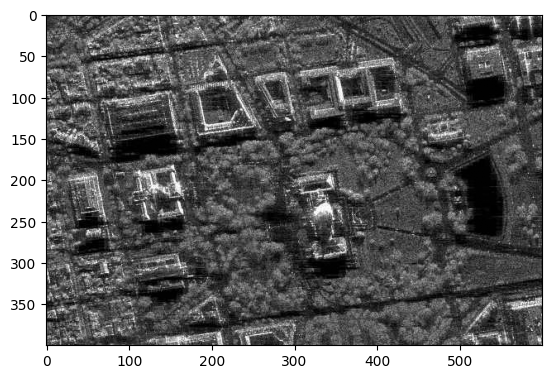

In [64]:
img = cv2.imread("sar_1_gray.jpg").astype("uint8")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

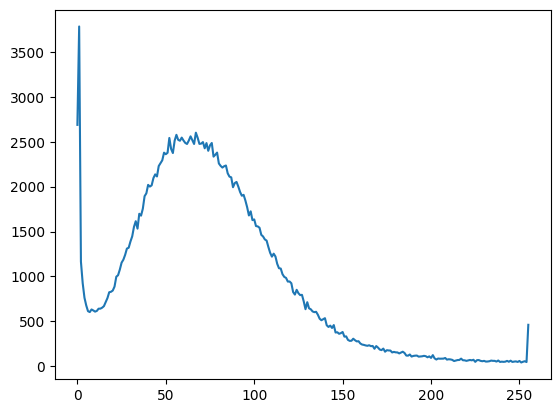

In [65]:
histSize = 256
histRange = (0, 256)
accumulate = False

img_gray_hist = cv2.calcHist([img_gray], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(img_gray_hist)

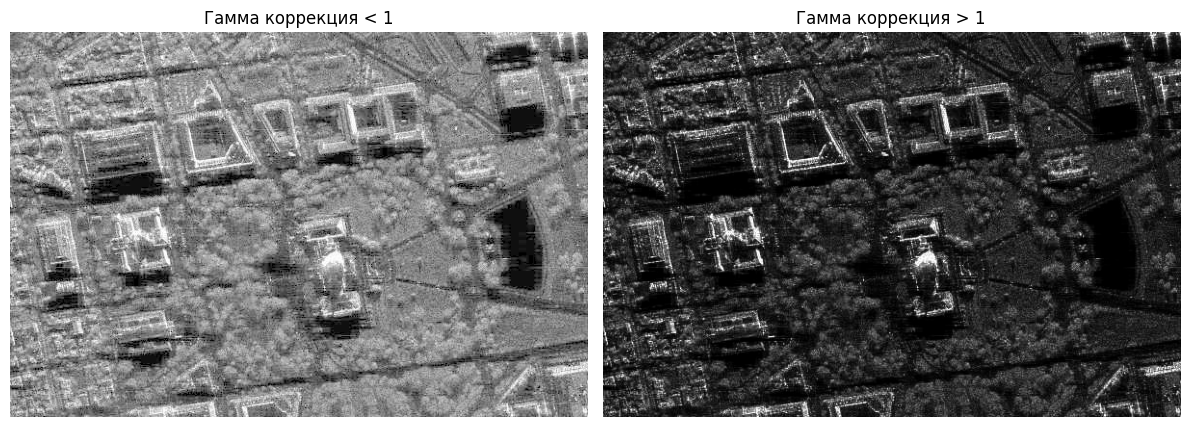

In [66]:
gamma_correction1 = 0.5
max_num = img.max()
img_correct1 = ((img/max_num) ** gamma_correction1) * max_num
img_correct1 = img_correct1.astype(np.uint8)

gamma_correction2 = 1.5
max_num = img.max()
img_correct2 = ((img/max_num) ** gamma_correction2) * max_num
img_correct2 = img_correct2.astype(np.uint8)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_correct1, cmap='gray')
plt.title('Гамма коррекция < 1')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_correct2, cmap='gray')
plt.title('Гамма коррекция > 1')
plt.axis('off')

plt.tight_layout()
plt.show()

SSIM для гамма < 1: 0.7875008686792753
SSIM для гамма > 1: 0.8065788107754002


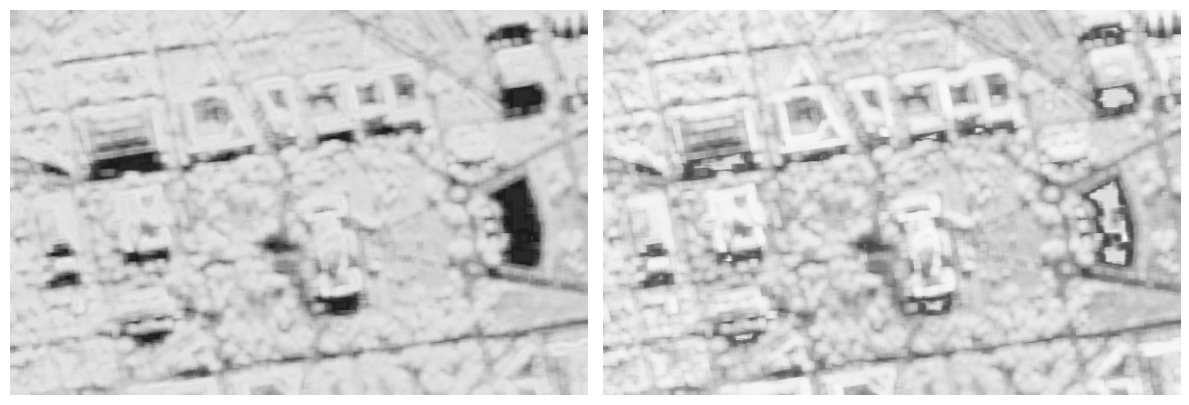

In [67]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim1, diff1) = structural_similarity(img, img_correct1, full=True, channel_axis=2)
diff1 = (diff1 * 255).astype("uint8")
print("SSIM для гамма < 1: {}".format(ssim1))

(ssim2, diff2) = structural_similarity(img, img_correct2, full=True, channel_axis=2)
diff2 = (diff2 * 255).astype("uint8")
print("SSIM для гамма > 1: {}".format(ssim2))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(diff1, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(diff2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [68]:
mse1 = mean_squared_error(img, img_correct1)
mse2 = mean_squared_error(img, img_correct2)
print(f'Mse для гамм < 1: {mse1}')
print(f'Mse для гамм > 1: {mse2}')

Mse для гамм < 1: 3250.429145833333
Mse для гамм > 1: 971.8206541666667


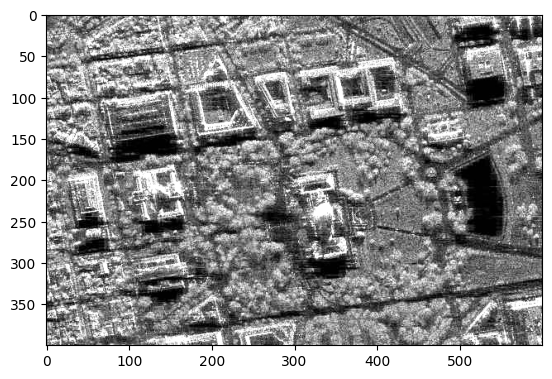

In [69]:
eq_gray = cv2.equalizeHist(img_gray)

b, g, r = cv2.split(img)
channels = [b, g, r]
channels_corrected = []

for ch in channels:
    mean_old = ch.mean()
    std_old = ch.std()
    
    mean_target = eq_gray.mean()
    std_target = eq_gray.std()
    
    ch_new = ((ch - mean_old) / std_old) * std_target + mean_target
    ch_new = np.clip(ch_new, 0, 255).astype(np.uint8)
    
    channels_corrected.append(ch_new)

img_corrected = cv2.merge(channels_corrected)
plt.imshow(cv2.cvtColor(img_corrected, cv2.COLOR_BGR2RGB))

In [70]:
thresholds = [50, 100, 150, 200]
algoritms = {"THRESH_BINARY": cv2.THRESH_BINARY, "THRESH_BINARY_INV": cv2.THRESH_BINARY_INV
             ,"THRESH_TRUNC": cv2.THRESH_TRUNC, "THRESH_TOZERO": cv2.THRESH_TOZERO, "THRESH_TOZERO_IN": cv2.THRESH_TOZERO_INV}

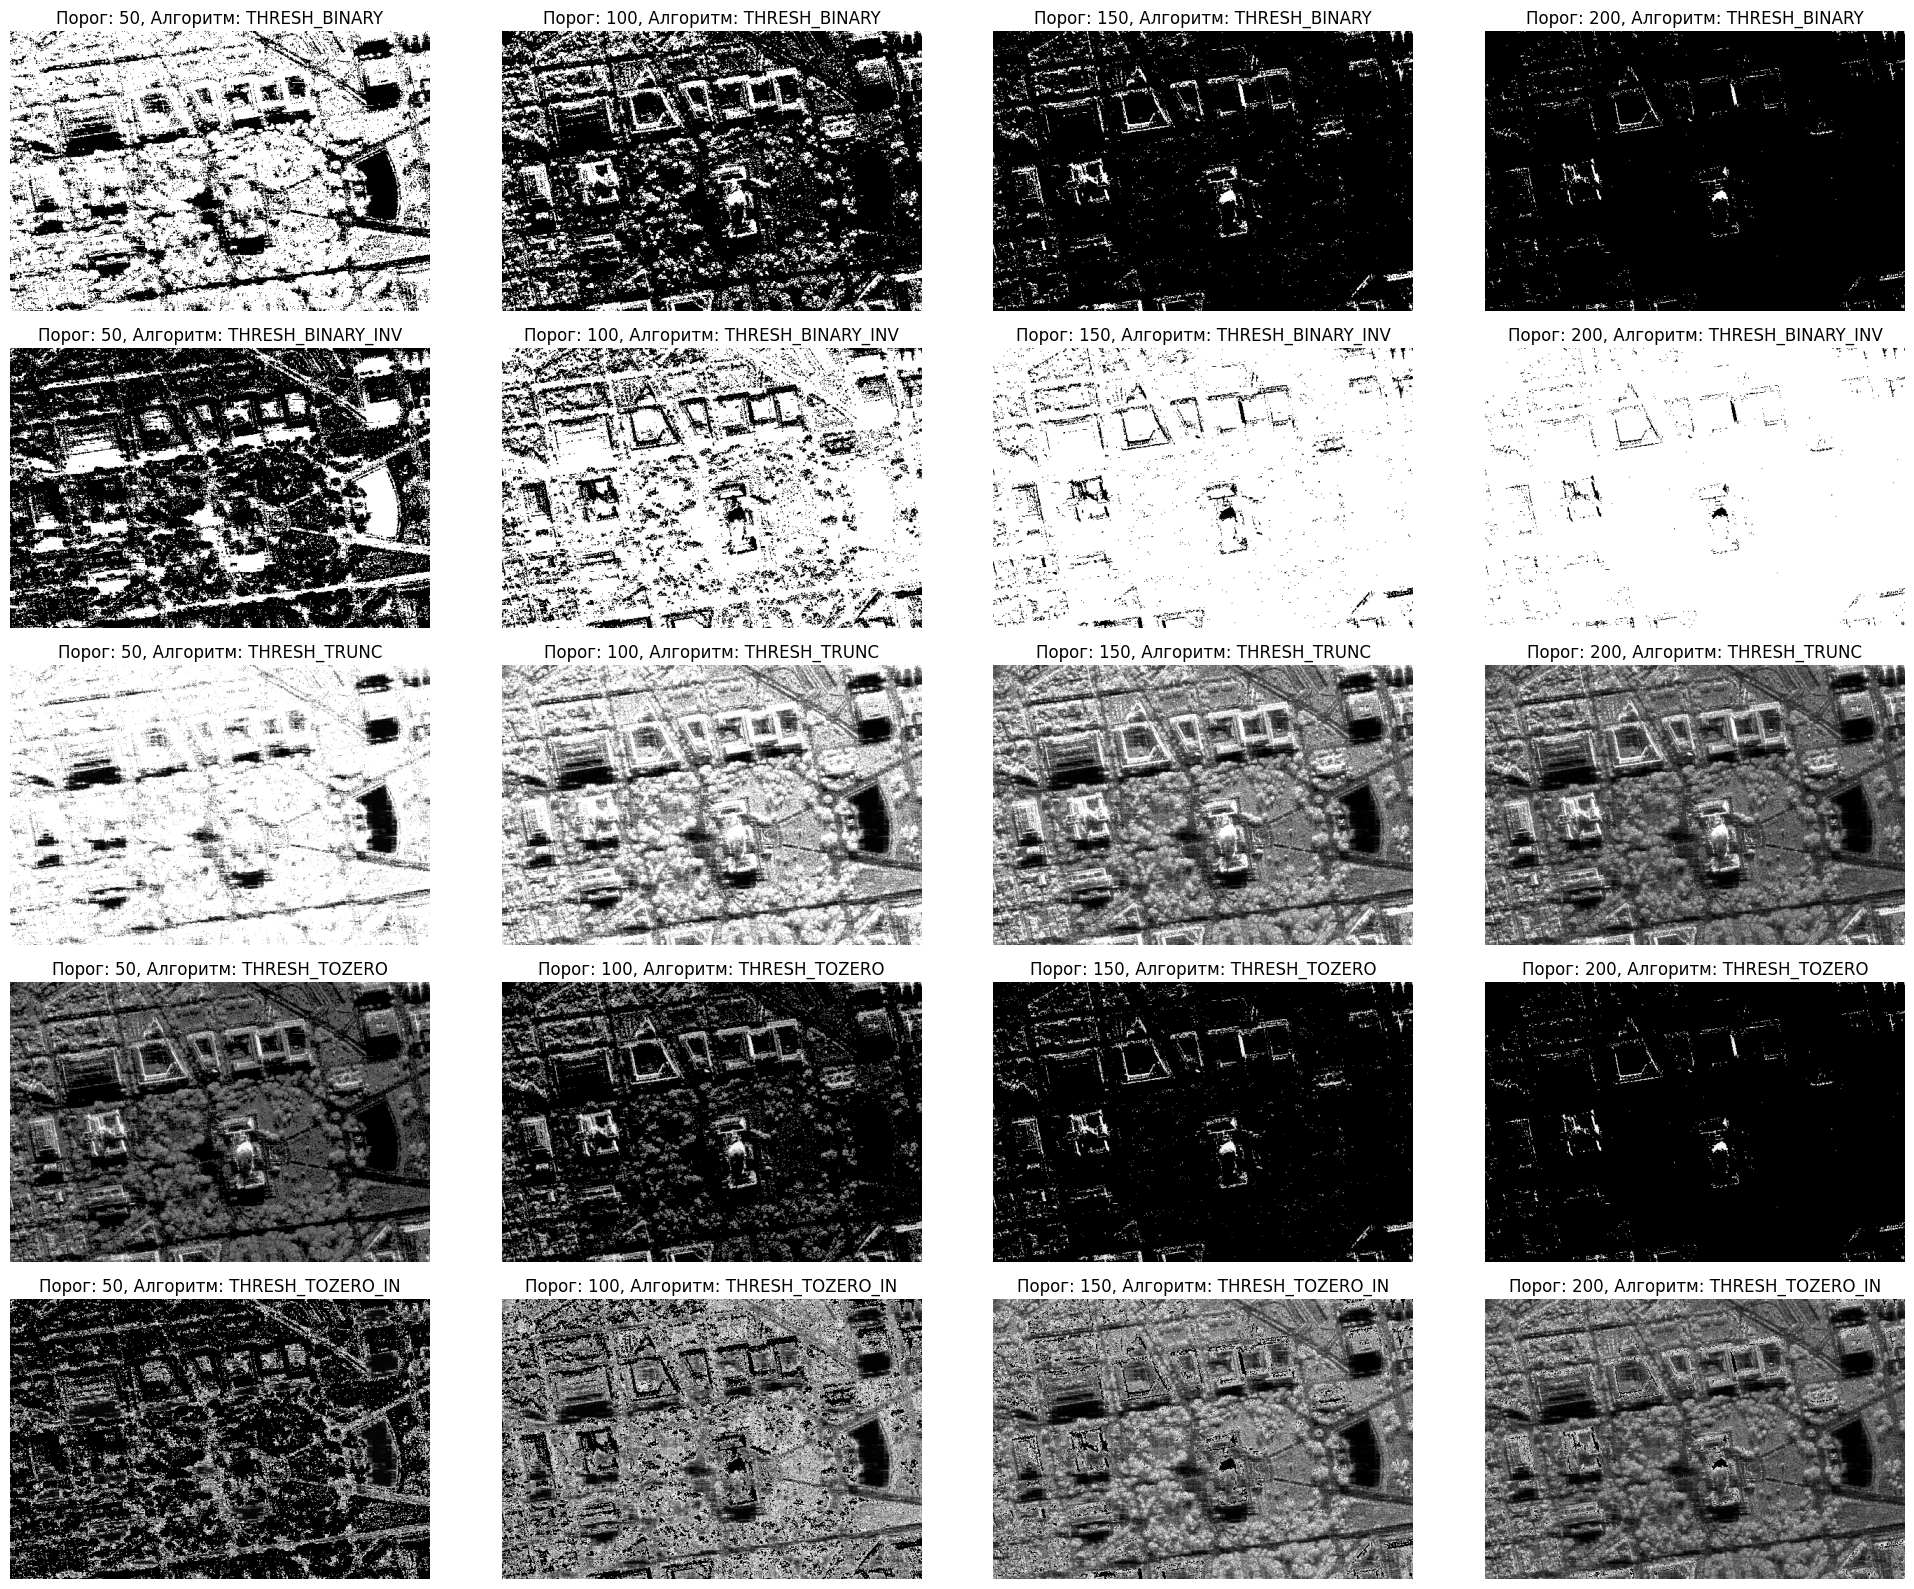

In [71]:
plt.figure(figsize=(20, 16))
for i, (k, v) in enumerate(algoritms.items()):
    for j in range(len(thresholds)):
        _,thresh = cv2.threshold(img_gray, thresholds[j], 255, v)
        plt.subplot(len(algoritms), len(thresholds), i * len(thresholds) + j + 1)
        plt.imshow(thresh, cmap='gray')
        plt.title(f"Порог: {thresholds[j]}, Алгоритм: {k}")
        plt.axis('off')
plt.tight_layout()
plt.show()